## ДЗ по уроку № 3 (26.06.2022)
## Теория вероятности
### Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

**Пример 1**

Даны значения зарплат из выборки выпускников: 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150. Посчитать (желательно без использования статистических методов наподобие std, var, mean) среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий, первый и третий квартили, интерквартильное расстояние. Найти выбросы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

In [2]:
nums = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [3]:
df = pd.DataFrame(nums)

In [4]:
# среднее арифметическое:

mean_salary = df.sum() / df.count()
mean_salary

0    65.3
dtype: float64

In [5]:
# проверка: 

df.mean()

0    65.3
dtype: float64

In [6]:
# среднее квадратичное отклонение:

n = len(nums)
sum_num = 0
for num in nums:
    sum_num += (num - mean_salary)**2
salary_std = np.sqrt(sum_num/n)
print(salary_std)

0    30.823854
dtype: float64


In [7]:
# проверка 1:

salary_std = np.sqrt(((df - df.mean())**2).sum() / df.count())
salary_std

0    30.823854
dtype: float64

In [8]:
# проверка 2:

df.std(ddof=0)

0    30.823854
dtype: float64

In [9]:
# смещенная оценка дисперсии:

salary_variance = salary_std**2
salary_variance

0    950.11
dtype: float64

In [10]:
# проверка 1:

salary_variance = ((df - df.mean())**2).sum() / df.count()
salary_variance

0    950.11
dtype: float64

In [11]:
# проверка 2:

df.var(ddof=0)

0    950.11
dtype: float64

In [12]:
# несмещенная оценка дисперсии:

n = len(nums) - 1
sum_num = 0
for num in nums:
    sum_num += (num - mean_salary)**2
salary_variance2 = (sum_num/n)
print(salary_variance2)

0    1000.115789
dtype: float64


In [13]:
# проверка 1:

salary_variance2 = ((df - df.mean())**2).sum() / (df.count() - 1)
salary_variance2

0    1000.115789
dtype: float64

In [14]:
# проверка 2:

df.var(ddof=1)

0    1000.115789
dtype: float64

In [15]:
# первый квартиль: 

np.percentile(df, 25)

42.0

In [16]:
# третий квартиль: 

np.percentile(df, 75)

81.0

In [17]:
# интерквартильное расстояние: 

np.percentile(df, 75) - np.percentile(df, 25)

39.0

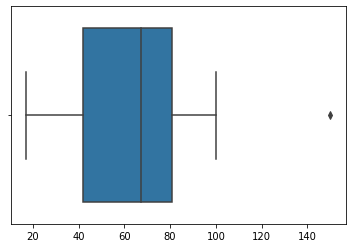

In [18]:
sns.boxplot(nums)
plt.show()

# выбросы: менее 17, более 100

**Пример 2**

В первом ящике находится 8 мячей, из которых 5 - белые. Во втором ящике - 12 мячей, из которых 5 белых. Из первого ящика вытаскивают случайным образом два мяча, из второго - 4. Какова вероятность того, что 3 мяча белые?

Благоприятными исходами при вытаскивании мячей из двух ящиков будут следующие комбинации мячей:
- 1-й ящик - 2 белых; 2-й ящик - 1 белый, 3 черных; 
- 1-й ящик - 1 белый, 1 черный; 2-й ящик - 2 белых, 2 черных;
- 1-й ящик - 2 черных; 2-й ящик - 3 белых, 1 черный. 

In [19]:
from math import factorial

def combinations(n, k):
    return int(factorial(n) / (factorial(k) * factorial(n - k)))

In [20]:
p1 = (combinations(5, 2)/combinations(8, 2))*(combinations(5, 1)*combinations(7, 3)/combinations(12, 4))
p2 = (combinations(5, 1)*combinations(3, 1)/combinations(8, 2))*(combinations(5, 2)*combinations(7, 2)/combinations(12, 4))
p3 = (combinations(3, 2)/combinations(8, 2))*(combinations(5, 3)*combinations(7, 1)/combinations(12, 4))
p = p1 + p2 + p3
print(p1, p2, p3, p)

0.12626262626262627 0.22727272727272727 0.01515151515151515 0.3686868686868687


Какова вероятность того, что 3 мяча белые?
__________________________________________
0.3687

**Пример 3**

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a). на факультете A б). на факультете B в). на факультете C? 

Искомые вероятности буду находить по формуле:

$$P(B_n\:|\:A) = \frac{P(B_n) \cdot P(A\:|\:B_n)}{P(A)}$$

Заданные вероятности сдать сессии в каждом факультете:

$$P(A\:|\:B_1) = 0.8$$

$$P(A\:|\:B_2) = 0.7$$

$$P(A\:|\:B_3) = 0.9$$

Вероятности, что случайно выбранный студент учится в данном факультете:

P(B1) = 0.25; 
P(B2) = 0.25; 
P(B3) = 0.5

Вероятность сдать сессию для случайного студента (по формуле полной вероятности): 

P(A) = 0.25 * 0.8 + 0.25 * 0.7 + 0.5 * 0.9 = 0.2 + 0.175 + 0.45 = 0.825

a). на факультете A

P(B1|A) = 0.25 * 0.8 / 0.825 = 0.2424

б). на факультете B

P(B2|A) = 0.25 * 0.7 / 0.825 = 0.2121

в). на факультете C

P(B3|A) = 0.5 * 0.9 / 0.825 = 0.5454

**Пример 4**

Устройство состоит из трех деталей. Для первой детали вероятность выйти из строя в первый месяц равна 0.1, для второй - 0.2, для третьей - 0.25. Какова вероятность того, что в первый месяц выйдут из строя: а). все детали б). только две детали в). хотя бы одна деталь г). от одной до двух деталей?

In [21]:
p1 = 0.1
p2 = 0.2
p3 = 0.25

In [22]:
# а) все детали - перемножаю вероятности: 

p = p1 * p2 * p3
p

0.005000000000000001

In [23]:
# б) только две детали: 

p = p1*p2*(1-p3) + p1*p3*(1-p2) + p2*p3*(1-p1)
p

0.08000000000000002

In [24]:
# в) хотя бы одна деталь:

q = (1-p1)*(1-p2)*(1-p3)
p = 1-q
p

0.45999999999999996

In [25]:
# г) от одной до двух деталей - можно представить как вероятность выхода из строя хотя бы одной детали 
# минус вероятность выхода из строя всех деталей

p = 1-q - p1 * p2 * p3
p

0.45499999999999996